# Missing data and aggregations

- in real world data there will be missing data and/or unwanted disturbance data

## Setup

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 10
# create dummy data
random_matrix = np.random.randint(1,10,(n,n)) # 2D array
index = np.random.choice(random_matrix.size, 10, replace=False)
print(index)
random_matrix = random_matrix*1.0
random_matrix.ravel()[index] = None
print(random_matrix)

[ 9 84  6 39 92 33 68 85 20 17]
[[ 7.  4.  8.  5.  7.  3. nan  8.  5. nan]
 [ 8.  8.  3.  6.  5.  2.  8. nan  2.  5.]
 [nan  6.  9.  1.  3.  7.  4.  9.  3.  5.]
 [ 3.  7.  5. nan  7.  2.  4.  9.  2. nan]
 [ 5.  2.  4.  7.  8.  3.  1.  4.  2.  8.]
 [ 4.  2.  6.  6.  4.  6.  2.  2.  4.  8.]
 [ 7.  9.  8.  5.  2.  5.  8.  9. nan  1.]
 [ 9.  7.  9.  8.  1.  8.  8.  3.  1.  8.]
 [ 3.  3.  1.  5. nan nan  7.  9.  8.  2.]
 [ 1.  7. nan  8.  5.  3.  8.  6.  3.  1.]]


In [42]:
scores = pd.DataFrame(random_matrix,
                      index=[f"Player {i}"for i in range(1, n+1)],
                      columns=[f"Round {i}"for i in range(1, n+1)]
                      )
scores.head()


,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,NaN,8.0,5.0,NaN
Player 2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,NaN,2.0,5.0
Player 3,NaN,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player 4,3.0,7.0,5.0,NaN,7.0,2.0,4.0,9.0,2.0,NaN
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0


In [43]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Player 1 to Player 10
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Round 1   9 non-null      float64
 1   Round 2   10 non-null     float64
 2   Round 3   9 non-null      float64
 3   Round 4   9 non-null      float64
 4   Round 5   9 non-null      float64
 5   Round 6   9 non-null      float64
 6   Round 7   9 non-null      float64
 7   Round 8   9 non-null      float64
 8   Round 9   9 non-null      float64
 9   Round 10  8 non-null      float64
dtypes: float64(10)
memory usage: 880.0+ bytes


## Missing value methods
- isnull() - returns True if null
- notnull() - returns True if not null
- dropna() - drops an axis with nulls
- fillna() - fills the null values with certain value

In [46]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,False,False,False,False,False,False,True,False,False,True
Player 2,False,False,False,False,False,False,False,True,False,False
Player 3,True,False,False,False,False,False,False,False,False,False
Player 4,False,False,False,True,False,False,False,False,False,True
Player 5,False,False,False,False,False,False,False,False,False,False
Player 6,False,False,False,False,False,False,False,False,False,False
Player 7,False,False,False,False,False,False,False,False,True,False
Player 8,False,False,False,False,False,False,False,False,False,False
Player 9,False,False,False,False,True,True,False,False,False,False
Player 10,False,False,True,False,False,False,False,False,False,False


In [47]:
scores.notnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,True,True,True,True,True,True,False,True,True,False
Player 2,True,True,True,True,True,True,True,False,True,True
Player 3,False,True,True,True,True,True,True,True,True,True
Player 4,True,True,True,False,True,True,True,True,True,False
Player 5,True,True,True,True,True,True,True,True,True,True
Player 6,True,True,True,True,True,True,True,True,True,True
Player 7,True,True,True,True,True,True,True,True,False,True
Player 8,True,True,True,True,True,True,True,True,True,True
Player 9,True,True,True,True,False,False,True,True,True,True
Player 10,True,True,False,True,True,True,True,True,True,True


In [50]:
scores.dropna()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0


In [54]:
scores.dropna(axis="columns")

,Round 2
Player 1,4.0
Player 2,8.0
Player 3,6.0
Player 4,7.0
Player 5,2.0
Player 6,2.0
Player 7,9.0
Player 8,7.0
Player 9,3.0
Player 10,7.0


In [63]:
# how to treat NaNs?
# depends on the situation
# often need to talk to domain experts
scores.fillna(0) # in this case - may be resonable to give 0 scores for missing value

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,0.0,8.0,5.0,0.0
Player 2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,0.0,2.0,5.0
Player 3,0.0,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player 4,3.0,7.0,5.0,0.0,7.0,2.0,4.0,9.0,2.0,0.0
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,0.0,1.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player 9,3.0,3.0,1.0,5.0,0.0,0.0,7.0,9.0,8.0,2.0
Player 10,1.0,7.0,0.0,8.0,5.0,3.0,8.0,6.0,3.0,1.0


## Missing value strategy

Strategy depends on:
- dataset size
- valuable information (some rows, some columns)
- percentage missing values
- domain knowledge
- missing values can impact
    - data visualization
    - arithmethic statistics
    - machine learning alghorithms

In [3]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

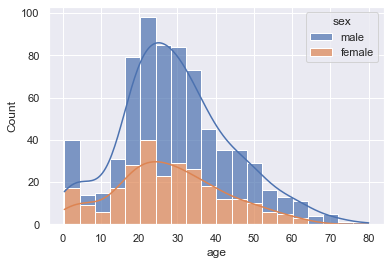

In [26]:
# focus on Age

sns.histplot(data=titanic, x="age", kde=True, hue="sex", alpha=0.7, multiple="stack")
sns.set_theme()

In [38]:
# talked to a titanic historian
# this dude says: use median age of corresponding gender to fill in ages

print(f"Number of males {sum(titanic['sex'] == 'male')}")
print(f"Number of females {sum(titanic['sex'] == 'female')}")

median_male = titanic.loc[titanic["sex"] == "male", "age"].median()
median_female = titanic.loc[titanic["sex"] == "female", "age"].median()

median_male, median_female

Number of males 577
Number of females 314


(29.0, 27.0)

In [46]:

titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male)
titanic.loc[titanic["age"]==29, "sex"].value_counts()

male      137
female      7
Name: sex, dtype: int64

In [51]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age             53
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [56]:

titanic.loc[titanic["sex"]=="female", "age"] = titanic.loc[titanic["sex"]=="female", "age"].fillna(median_female)
titanic.loc[titanic["age"]==27, "sex"].value_counts()

female    59
male      12
Name: sex, dtype: int64

In [57]:
titanic.isnull().sum().age

0

<AxesSubplot:xlabel='age', ylabel='Count'>

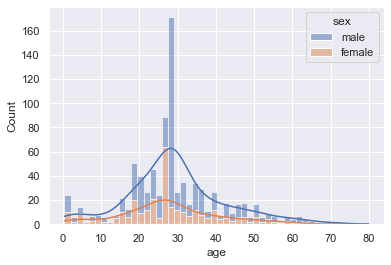

In [58]:
sns.histplot(data=titanic, x="age", kde=True, multiple="stack",hue="sex", bins=50)

In [60]:
# groupby
titanic.groupby("sex").median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,1.0,2.0,27.0,0.0,0.0,23.0,0.0,0.0
male,0.0,3.0,29.0,0.0,0.0,10.5,1.0,1.0


In [61]:
titanic.groupby("sex").max()

C:\Users\lukas\AppData\Local\Temp/ipykernel_17192/3636409492.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  titanic.groupby("sex").max()


,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,1,3,63.0,8,6,512.3292,woman,False,yes,True
male,1,3,80.0,8,5,512.3292,man,True,yes,True


In [64]:
titanic.groupby("sex").mean()[["survived", "age"]]

,survived,age
sex,,
female,0.742038,27.761146
male,0.188908,30.355581
